# **In this notebook, we explore the data of Open Damir in 2024**

## Loading the data

In [1]:
import polars as pl
import time

DATA_2024 = []
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
start_time = time.time()
for month in months: 
    DATA_2024.append(pl.read_csv("D:\\projet s8 files\\A2024{}.csv".format(month), separator=';', ignore_errors=True, columns=['AGE_BEN_SNDS', 'ASU_NAT', 'BEN_SEX_COD', 'CPT_ENV_TYP', 'FLT_PAI_MNT', 'FLT_REM_MNT']))
end_time = time.time()
print("The time needed for the loading of the data is : {}s".format(end_time-start_time))

The time needed for the loading of the data is : 169.16560459136963s


**Give the count of every line such that the reimbursement is negative by the SS**

In [2]:
months_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for i, data in enumerate(DATA_2024):
    data_neg = data.filter(data['FLT_REM_MNT'] < 0)
    print(f"The size of the {months_names[i]} data for  is : {data.shape}")
    print(f"The size of the negative {months_names[i]} data for  is : {data_neg.shape}")
    


The size of the January data for  is : (38758176, 6)
The size of the negative January data for  is : (5829184, 6)
The size of the February data for  is : (36445251, 6)
The size of the negative February data for  is : (5490244, 6)
The size of the March data for  is : (36346160, 6)
The size of the negative March data for  is : (5465488, 6)
The size of the April data for  is : (36248691, 6)
The size of the negative April data for  is : (5240798, 6)
The size of the May data for  is : (36940288, 6)
The size of the negative May data for  is : (4992228, 6)
The size of the June data for  is : (37363788, 6)
The size of the negative June data for  is : (4847137, 6)
The size of the July data for  is : (39730422, 6)
The size of the negative July data for  is : (4906198, 6)
The size of the August data for  is : (34439860, 6)
The size of the negative August data for  is : (4127373, 6)
The size of the September data for  is : (36205150, 6)
The size of the negative September data for  is : (4184563, 6

**Calculate the amount paid and the amount reimbursed by the SS, and at last the RAC**

In [3]:
amounts_paid = []
amounts_reimbured = []
for i, data in enumerate(DATA_2024):
    amounts_paid.append(data['FLT_PAI_MNT'].sum())
    amounts_reimbured.append(data['FLT_REM_MNT'].sum())
    print(f"The total amount paid for the month of {months_names[i]} is : {amounts_paid[i]}")
    print(f"The total amount reimbursed for the month of {months_names[i]} is : {amounts_reimbured[i]}")


The total amount paid for the month of January is : 14144666470.159996
The total amount reimbursed for the month of January is : 13311989353.640001
The total amount paid for the month of February is : 13589662729.23
The total amount reimbursed for the month of February is : 12560276443.039995
The total amount paid for the month of March is : 13328616382.430004
The total amount reimbursed for the month of March is : 12482883416.36
The total amount paid for the month of April is : 13156230116.510015
The total amount reimbursed for the month of April is : 12517522189.269997
The total amount paid for the month of May is : 15280226958.52
The total amount reimbursed for the month of May is : 14028087985.489983
The total amount paid for the month of June is : 14661110895.169998
The total amount reimbursed for the month of June is : 13429169032.779985
The total amount paid for the month of July is : 15464710988.569998
The total amount reimbursed for the month of July is : 14329503219.50999
The

In [4]:
RAC = []
for i in range(12):
    RAC.append(amounts_paid[i] -amounts_reimbured[i])
RAC

[832677116.5199947,
 1029386286.1900043,
 845732966.0700035,
 638707927.2400188,
 1252138973.0300179,
 1231941862.3900127,
 1135207769.060007,
 -107783995.87000084,
 712846642.6199856,
 1293147606.799984,
 773026364.3400059,
 838369745.1099834]

Load the data to a pandas dataframe

In [5]:
import pandas as pd
df_1 = pd.DataFrame({'Month': months_names, 'Amount Paid': amounts_paid, 'Amount Reimbursed': amounts_reimbured, 'RAC': RAC})
df_1.to_csv("df_mois_merged_2024.csv")

Visualize this trend

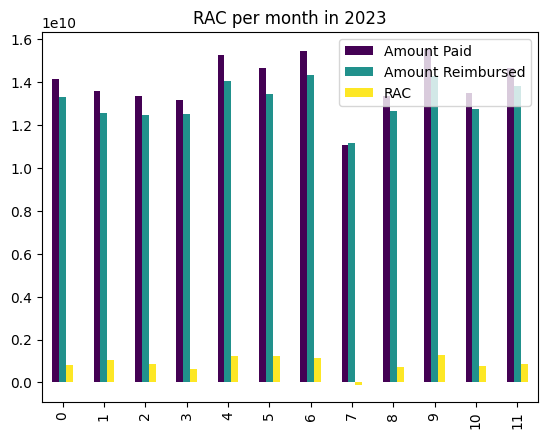

In [6]:
import matplotlib.pyplot as plt
df_1[["Amount Paid", "Amount Reimbursed", "RAC"]].plot(kind="bar", stacked=False, colormap="viridis")
plt.title('RAC per month in 2023')
plt.show()